![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [6]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [7]:
# Impresión histograma de variable de interés (y)
df.target.hist()

<Axes: >

In [8]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [9]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Error Cuadrático Medio (MSE): 0.0371
                                               Comentario  Toxicidad Real  \
356574  Interesting ! Sorry to hear of a small busines...             0.0   
471747  I will take that into consideration, Motley. I...             0.0   
118328  I guess after having a somewhat positive portr...             0.0   
142944  According to leading Public Finance and Enviro...             0.0   
496670  Great. What were you ever even thinking? Now y...             0.0   

        Toxicidad Predicha  
356574           -0.012871  
471747            0.051089  
118328           -0.022229  
142944            0.150412  
496670            0.078741  


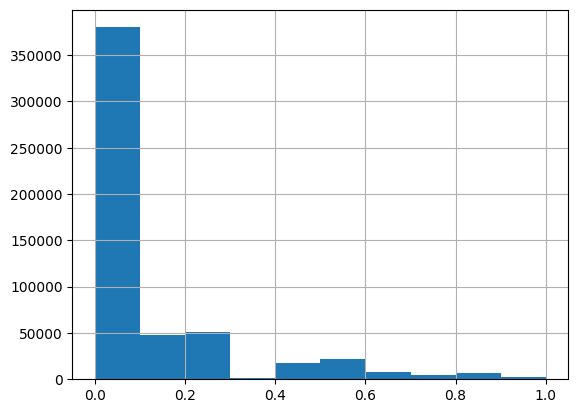

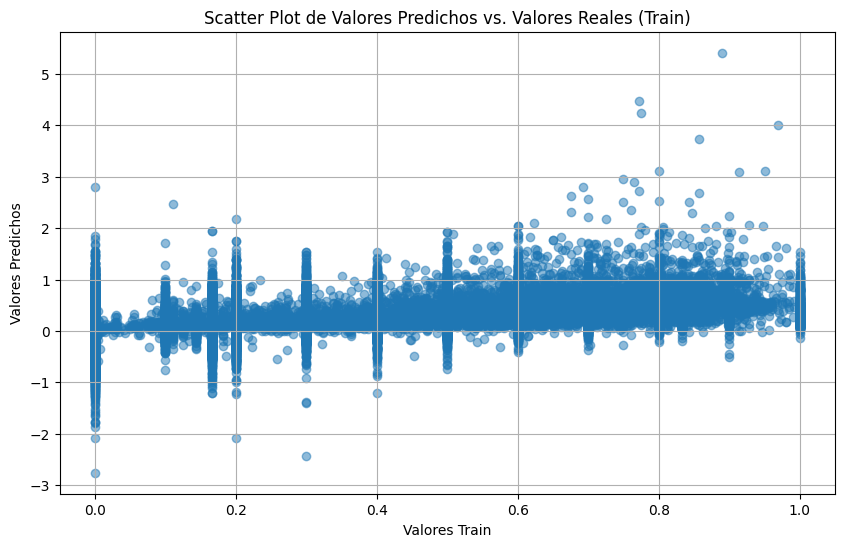

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import matplotlib.pyplot as plt


# Crear y ajustar el CountVectorizer en los datos de entrenamiento
#vectorizer = CountVectorizer(max_features=1000)
vectorizer = CountVectorizer()
# Limitando características para evitar problemas de memoria
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo vectorizador
X_test_vectorized = vectorizer.transform(X_test)

# Regresión lineal
rl = LinearRegression()
rl.fit(X_train_vectorized, y_train)
y_pred= rl.predict(X_test_vectorized )

# Import Random Forest Regressor class
#modelo = RandomForestRegressor(random_state=0)
#modelo.fit(X_train_vectorized, y_train)
# Hacer predicciones en el conjunto de prueba
#y_pred = modelo.predict(X_test_vectorized)

# Calcular el MSE
mse1 = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse1:.4f}")

# Mostrar algunos ejemplos de predicciones
import pandas as pd
resultados = pd.DataFrame({
    'Comentario': X_test.iloc[:5],
    'Toxicidad Real': y_test.iloc[:5],
    'Toxicidad Predicha': y_pred[:5]
})
print(resultados)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Train')
plt.ylabel('Valores Predichos')
plt.title('Scatter Plot de Valores Predichos vs. Valores Reales (Train)')
plt.grid(True)
plt.show()

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear y ajustar el CountVectorizer con trigramas en los datos de entrenamiento
# ngram_range=(1,3) incluye unigramas, bigramas y trigramas
vectorizer = CountVectorizer(ngram_range=(3,3))
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo vectorizador
X_test_vectorized = vectorizer.transform(X_test)

# Crear y entrenar el modelo de Random Forest
#modelo = RandomForestRegressor(random_state=0)
#modelo.fit(X_train_vectorized, y_train)
#y_pred = modelo.predict(X_test_vectorized)
# Regresión lineal
rl = LinearRegression()
rl.fit(X_train_vectorized, y_train)
y_pred= rl.predict(X_test_vectorized )

# Calcular el MSE
mse2 = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse2:.4f}")

# Opcional: Mostrar algunos ejemplos de predicciones
import pandas as pd
resultados = pd.DataFrame({
    'Comentario': X_test.iloc[:5],
    'Toxicidad Real': y_test.iloc[:5],
    'Toxicidad Predicha': y_pred[:5]
})
print(resultados)


Error Cuadrático Medio (MSE): 0.0398
                                               Comentario  Toxicidad Real  \
356574  Interesting ! Sorry to hear of a small busines...             0.0   
471747  I will take that into consideration, Motley. I...             0.0   
118328  I guess after having a somewhat positive portr...             0.0   
142944  According to leading Public Finance and Enviro...             0.0   
496670  Great. What were you ever even thinking? Now y...             0.0   

        Toxicidad Predicha  
356574           -0.098531  
471747            0.032956  
118328           -0.006957  
142944           -0.010804  
496670            0.145794  


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

## <span style="color: blue;">¿Qué es TfidfVectorizer?</span>

TfidfVectorizer es una herramienta de procesamiento de texto que convierte una colección de documentos en una matriz de características numéricas basadas en la frecuencia de los términos ponderada por su importancia relativa en la colección de textos analizada. El nombre "TF-IDF" proviene de "Term Frequency-Inverse Document Frequency" (Frecuencia de Término-Frecuencia Inversa de Documento).

## <span style="color: blue;">Funcionamiento</span>

TfidfVectorizer funciona en dos componentes principales:

1. **Term Frequency (TF)**: Mide la frecuencia con la que aparece un término en un documento.
   - TF(t,d) = (Número de veces que el término t aparece en el documento d) / (Número total de términos en el documento d)

2. **Inverse Document Frequency (IDF)**: Mide la importancia de un término en todo el corpus de documentos.
   - IDF(t) = log[(Número total de documentos) / (Número de documentos que contienen el término t)]

3. **TF-IDF**: Es el producto de estos dos componentes.
   - TF-IDF(t,d) = TF(t,d) × IDF(t)

Este valor será:
- Alto para términos que aparecen frecuentemente en un documento pero raramente en el corpus completo
- Bajo para términos que aparecen en muchos documentos o con baja frecuencia en un documento
- Cero para términos que aparecen en todos los documentos

## <span style="color: blue;">Ventajas de TfidfVectorizer sobre CountVectorizer</span>

1. **Pondera la relevancia de los términos**: No solo cuenta apariciones, sino que asigna mayor importancia a palabras distintivas y menor a palabras comunes.

2. **Reduce el impacto de palabras frecuentes**: Palabras como "el", "la", "y", que aparecen en casi todos los documentos, reciben un peso muy bajo, lo que mejora la capacidad discriminativa.

3. **Mejor rendimiento en clasificación y regresión**: Generalmente produce mejores resultados en tareas de aprendizaje automático al capturar mejor la importancia semántica de las palabras.

4. **Normalización incorporada**: TfidfVectorizer suele incluir normalización por defecto, lo que hace que los documentos de diferentes longitudes sean más comparables.

## <span style="color: blue;">Desventajas de TfidfVectorizer</span>

1. **Mayor complejidad computacional**: Requiere más cálculos que CountVectorizer, lo que puede ser relevante con corpus muy grandes.

2. **Pérdida de interpretabilidad directa**: Los valores TF-IDF son menos intuitivos que los simples conteos de palabras.

3. **Requiere todo el corpus para el cálculo**: Para calcular IDF necesita procesar todos los documentos, lo que puede ser un problema para aplicaciones de streaming o incrementales.

4. **No captura semántica profunda**: Al igual que CountVectorizer, no captura relaciones semánticas complejas entre palabras ni el contexto completo.

## <span style="color: blue;">Conclusión</span>

TfidfVectorizer es generalmente superior a CountVectorizer para tareas de clasificación y regresión de texto porque pondera los términos según su importancia relativa en el corpus. Esto permite que el modelo se enfoque en las palabras más discriminativas y relevantes para la tarea, ignorando términos comunes que aportan poco valor predictivo. Sin embargo, implica un costo computacional ligeramente mayor y puede ser menos adecuado para aplicaciones donde se necesita procesar documentos de forma incremental.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear y ajustar el TfidfVectorizer en los datos de entrenamiento
vectorizer = TfidfVectorizer()  # Limitando características para evitar problemas de memoria
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba usando el mismo vectorizador
X_test_vectorized = vectorizer.transform(X_test)

# Crear y entrenar el modelo de Random Forest
#modelo = RandomForestRegressor(random_state=0)
#modelo.fit(X_train_vectorized, y_train)
# Hacer predicciones en el conjunto de prueba
#y_pred = modelo.predict(X_test_vectorized)

# Regresión lineal
rl = LinearRegression()
rl.fit(X_train_vectorized, y_train)
y_pred= rl.predict(X_test_vectorized )

# Calcular el MSE
mse3 = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse3:.4f}")

# Opcional: Mostrar algunos ejemplos de predicciones
import pandas as pd
resultados = pd.DataFrame({
    'Comentario': X_test.iloc[:5],
    'Toxicidad Real': y_test.iloc[:5],
    'Toxicidad Predicha': y_pred[:5]
})
print(resultados)


Error Cuadrático Medio (MSE): 0.0280
                                               Comentario  Toxicidad Real  \
356574  Interesting ! Sorry to hear of a small busines...             0.0   
471747  I will take that into consideration, Motley. I...             0.0   
118328  I guess after having a somewhat positive portr...             0.0   
142944  According to leading Public Finance and Enviro...             0.0   
496670  Great. What were you ever even thinking? Now y...             0.0   

        Toxicidad Predicha  
356574           -0.037130  
471747            0.044880  
118328            0.093684  
142944            0.019764  
496670            0.055192  


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

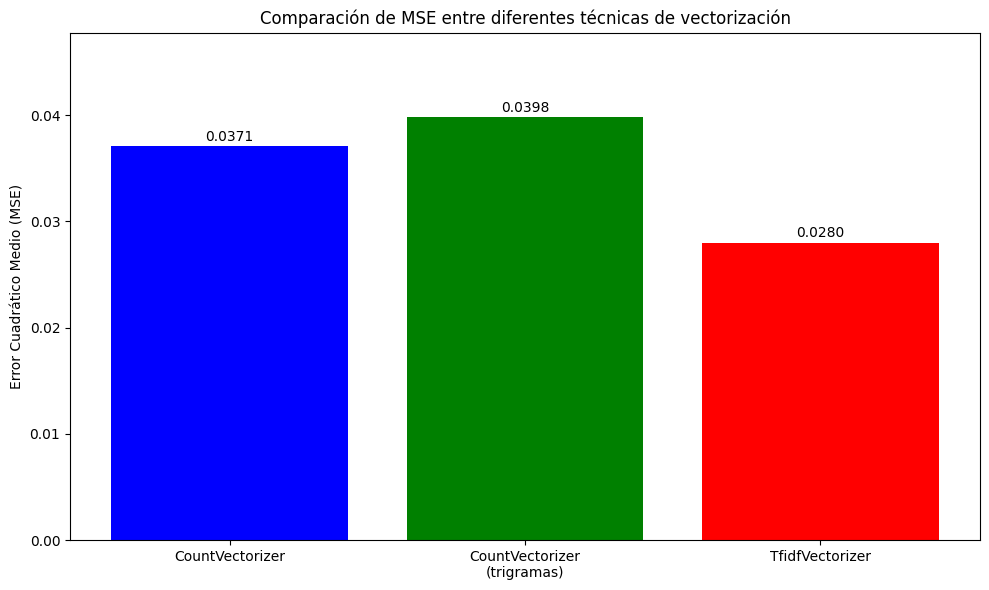

In [20]:
import matplotlib.pyplot as plt

modelos = ['CountVectorizer', 'CountVectorizer\n(trigramas)', 'TfidfVectorizer']
mse_valores = [mse1, mse2, mse3]

# Crear gráfico de barras simple
plt.figure(figsize=(10, 6))
barras = plt.bar(modelos, mse_valores, color=['blue', 'green', 'red'])

# Añadir etiquetas y título
plt.title('Comparación de MSE entre diferentes técnicas de vectorización')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.ylim(0, max(mse_valores) * 1.2)  # Ajustar el límite superior del eje y

# Añadir los valores de MSE encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura + 0.0005,
            f'{altura:.4f}', ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

1. **CountVectorizer Simple vs. Trigramas**:
   - La inclusión de n-gramas (secuencias de hasta 3 palabras) mejora el rendimiento porque captura mejor el contexto y las frases específicas que pueden indicar toxicidad.
   - Los trigramas permiten identificar expresiones completas que podrían ser tóxicas, algo que se pierde cuando solo se consideran palabras individuales.
   - Sin embargo, esto aumenta significativamente la dimensionalidad del espacio de características, lo que puede llevar a problemas de sobreajuste si no se tiene suficiente datos.


2. **CountVectorizer vs. TfidfVectorizer**:

   - TF-IDF mejora el rendimiento porque pondera las palabras según su importancia relativa en el corpus.
   - Palabras comunes que aparecen en muchos comentarios (como "el", "la", "y") reciben menos peso, mientras que términos más distintivos y potencialmente más indicativos de toxicidad reciben mayor peso.
   - Esto permite que el modelo se enfoque en las palabras que realmente ayudan a discriminar entre comentarios tóxicos y no tóxicos.

## Conclusiones

El mejor rendimiento se obtuvo con el modelo que utiliza TfidfVectorizer, lo que demuestra que no solo importa qué palabras aparecen en un comentario, sino también su relevancia en el contexto general del texto. La combinación de TF-IDF con un algoritmo potente como Random Forest permite capturar tanto la importancia de las palabras como las relaciones no lineales entre las características.
